Download dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

Slide: https://www.canva.com/design/DAE_DDCf_H0/mPe-ohfXB-1KSWnWT43aAw/edit?utm_content=DAE_DDCf_H0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Python_for_DataScience/Project"

/content/drive/MyDrive/Python_for_DataScience/Project


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
dataset = pd.read_csv('diabetes.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
dataset_drop_outcome = dataset.drop(columns='Outcome', axis=1)

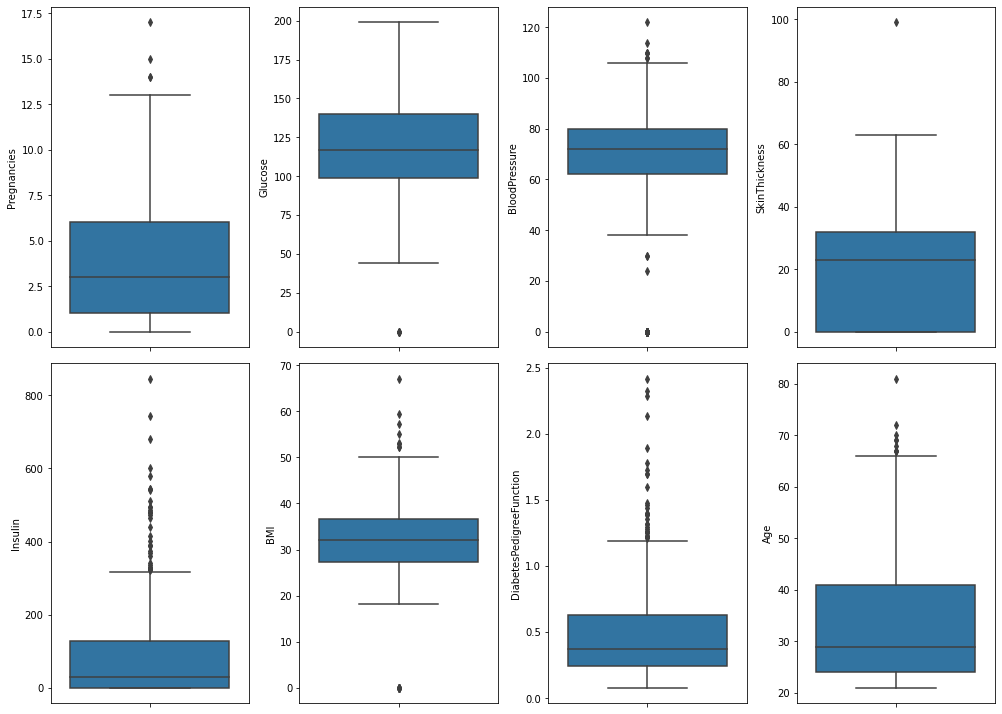

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(14, 10))
index = 0
axs = axs.flatten()
for k,v in dataset_drop_outcome.items():
    sns.boxplot(y=k, data=dataset_drop_outcome, ax=axs[index])
    index += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)

In [ ]:
#outliers
for k, v in dataset_drop_outcome.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Pregnancies outliers = 0.52%
Column Glucose outliers = 0.65%
Column BloodPressure outliers = 5.86%
Column SkinThickness outliers = 0.13%
Column Insulin outliers = 4.43%
Column BMI outliers = 2.47%
Column DiabetesPedigreeFunction outliers = 3.78%
Column Age outliers = 1.17%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

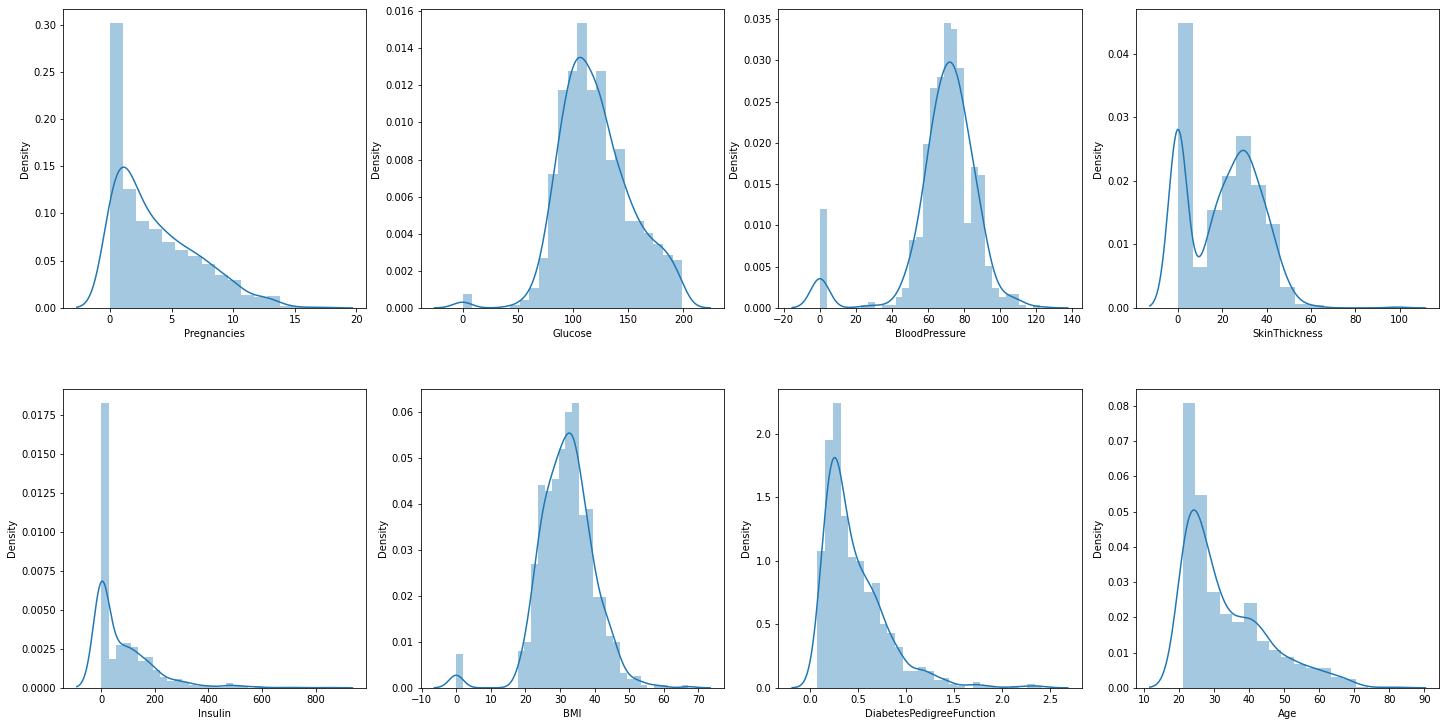

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset_drop_outcome.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#upsampling
df_majority = dataset[dataset['Outcome']==0]
df_minority = dataset[dataset['Outcome']==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=500)
dataset = pd.concat([df_majority, df_minority_upsampled])
dataset['Outcome'].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [ ]:
X = dataset.drop(columns='Outcome', axis=1)
y = dataset['Outcome']

In [ ]:
#Data standardization
sc = StandardScaler()
sc.fit(X)
standardized_data = sc.transform(X)
print(standardized_data)

[[-0.86282741 -1.18388367 -0.13918399 ... -0.78929528 -0.41071698
  -0.27194763]
 [-0.86282741 -1.06515396 -0.13918399 ... -0.59062047 -0.96124785
  -1.12766704]
 [ 0.23456834 -0.26372838  0.25706936 ... -0.92174515 -0.85951932
  -0.35751957]
 ...
 [-1.13717635  0.09246077 -0.04012065 ... -0.27274078  2.70097928
  -0.78537927]
 [-1.13717635 -0.02626895  0.05894269 ... -0.68333538 -0.70094249
   0.15591208]
 [ 0.23456834 -0.26372838  0.25706936 ... -0.03433101  0.51381585
   0.07034014]]


In [ ]:
X = standardized_data
y = dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [ ]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [ ]:
num_folds = 10
seed = 50
scoring = 'accuracy'

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
#Evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.752500 (0.042500)
LDA: 0.756250 (0.039231)
KNN: 0.755000 (0.043012)
CART: 0.830000 (0.024495)
NB: 0.738750 (0.029817)
SVM: 0.780000 (0.056513)


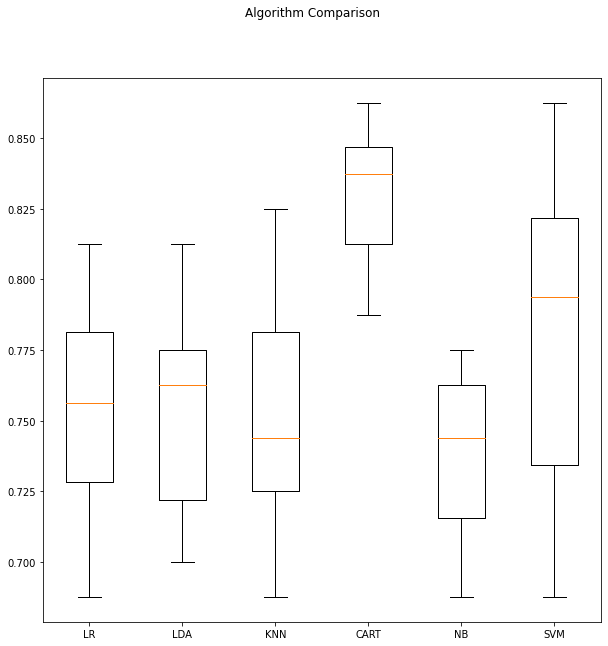

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [ ]:
feature_cols = ['Pregnancies', 'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pipe = Pipeline(steps=[('sc', sc),
                        ('dec_tree', clf)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2, 4, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18]
splitter = ['best', 'random']
min_samples_split = [1, 2, 3, 4]
parameters = dict(dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth,
                  dec_tree__splitter=splitter)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best splitter:', clf_GS.best_estimator_.get_params()['dec_tree__splitter'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 13
Best splitter: best

DecisionTreeClassifier(criterion='entropy', max_depth=13)


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=13)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.835


In [ ]:
feature_cols = ['Pregnancies', 'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

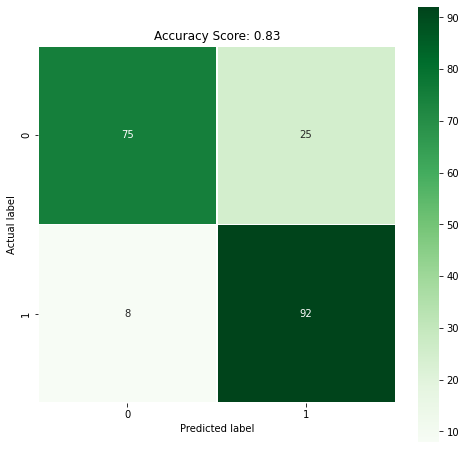

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
score = clf.score(X_test, y_test) 
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: %.2f' %score
plt.title(all_sample_title, size = 12)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       100
           1       0.79      0.92      0.85       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



In [ ]:
#Diabetes Predict System
#6	148	72	35	0	33.6	0.627	50 => 1
#1	85	66	29	0	26.6	0.351	31 => 0
#8	183	64	0	0	23.3	0.672	32	=> 1
#1	89	66	23	94	28.1	0.167	21 =>	0
print('\x1b[0;30;43m' + '|     WELCOME TO DIABETES PREDICT SYSTEM     |' + '\x1b[0m')
print('==============================================')
preg = int(input('             Pregnancies: '))
glu = int(input('                 Glucose: '))
blood = int(input('           BloodPressure: '))
skin = int(input('           SkinThickness: '))
ins = int(input('                 Insulin: '))
bmi = float(input('                     BMI: '))
ped = float(input('DiabetesPedigreeFunction: '))
age = int(input('                     Age: '))
input_set = np.array([preg, glu, blood, skin, ins, bmi, ped, age]).reshape(1, -1)
std_data = sc.transform(input_set)
output = clf.predict(std_data)
print('==============================================')
if output == 0:
  print("             \x1b[0;30;42m" + 'Don\'t have diabetes!' + '\x1b[0m')
else:
  print("                 \x1b[0;30;41m" + 'Have diabetes!' + '\x1b[0m')

|     WELCOME TO DIABETES PREDICT SYSTEM     |
             Pregnancies: 1
                 Glucose: 85
           BloodPressure: 66
           SkinThickness: 29
                 Insulin: 0
                     BMI: 26.6
DiabetesPedigreeFunction: 0.351
                     Age: 31
             Don't have diabetes!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
